Simulasi Permainan Kasino dengan Random Number Generator (RNG)


Total Taruhan: $10000
Total Pembayaran: $7950
Return to Player (RTP): 79.50%

Tabel Hasil Simulasi Mesin Slot:
      Putaran                 Simbol  Payout
0           1      Bell, Bell, Lemon       0
1           2       Bar, Cherry, Bar       0
2           3      Cherry, Bar, Bell       0
3           4    Bell, Lemon, Cherry       0
4           5     Cherry, Lemon, Bar       0
...       ...                    ...     ...
9995     9996             7, 7, Bell       0
9996     9997     Bell, Cherry, Bell       0
9997     9998        Bar, Bar, Lemon       0
9998     9999          Bell, Bell, 7       0
9999    10000  Cherry, Lemon, Cherry       0

[10000 rows x 3 columns]


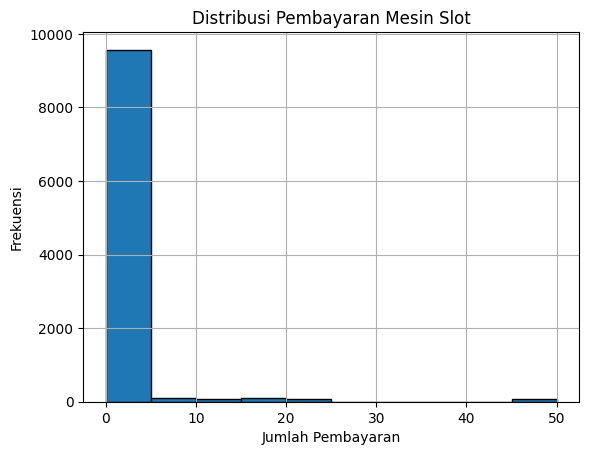

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameter mesin slot
symbols = ["Cherry", "Lemon", "Bar", "7", "Bell"]
paylines = {
    "Cherry": 5,
    "Lemon": 10,
    "Bar": 15,
    "7": 50,
    "Bell": 20
}
n_reels = 3  # Jumlah gulungan
n_spins = 10000  # Jumlah putaran yang disimulasikan
bet = 1  # Taruhan per putaran

# Fungsi untuk menghasilkan hasil acak mesin slot
def spin_slot():
    return np.random.choice(symbols, size=n_reels, replace=True)

# Fungsi untuk menghitung kemenangan berdasarkan kombinasi simbol
def calculate_payout(reel_result):
    unique, counts = np.unique(reel_result, return_counts=True)
    payout = 0
    for symbol, count in zip(unique, counts):
        if count == 3:  # Kemenangan jika ada 3 simbol yang sama
            payout += paylines[symbol]
    return payout

# Simulasi permainan mesin slot
def simulate_slot_machine(n_spins):
    results = []
    total_bet = 0
    total_payout = 0
    payout_data = []

    for spin in range(n_spins):
        result = spin_slot()
        payout = calculate_payout(result)
        results.append(payout)
        total_bet += bet
        total_payout += payout
        # Simpan data setiap putaran
        payout_data.append({
            "Putaran": spin + 1,
            "Simbol": ', '.join(result),  # Menampilkan simbol dalam bentuk string
            "Payout": payout
        })

    # Menghitung Return to Player (RTP)
    rtp = (total_payout / total_bet) * 100
    return payout_data, total_bet, total_payout, rtp, results

# Jalankan simulasi
payout_data, total_bet, total_payout, rtp, results = simulate_slot_machine(n_spins)

# Membuat tabel menggunakan pandas
df_payouts = pd.DataFrame(payout_data)

# Menampilkan tabel hasil simulasi tanpa diagram
print(f"\nTotal Taruhan: ${total_bet}")
print(f"Total Pembayaran: ${total_payout}")
print(f"Return to Player (RTP): {rtp:.2f}%")

# Menampilkan tabel hasil simulasi dengan format yang lebih rapi
pd.set_option('display.max_rows', 10)  # Menampilkan hanya 10 baris pertama tabel
pd.set_option('display.width', 1000)  # Lebar kolom yang cukup untuk menampilkan data
print("\nTabel Hasil Simulasi Mesin Slot:")
print(df_payouts)

# Membuat histogram dari hasil pembayaran
plt.hist(results, bins=range(0, max(results)+1, 5), edgecolor='black')
plt.title("Distribusi Pembayaran Mesin Slot")
plt.xlabel("Jumlah Pembayaran")
plt.ylabel("Frekuensi")
plt.grid(True)
plt.show()


Simulasi ini digunakan untuk memahami bagaimana mesin slot bekerja, menghitung pembayaran berdasarkan hasil acak, dan mengukur RTP berdasarkan data yang terkumpul dari banyak putaran.